# Visualizations from AQI Data in S3 Bucket

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from bokeh.plotting import figure, save
from bokeh.models import ColumnDataSource

In [8]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure, ColumnDataSource
from bokeh.tile_providers import get_provider, Vendors
from bokeh.palettes import Inferno
from bokeh.transform import linear_cmap,factor_cmap
from bokeh.layouts import row, column
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, NumeralTickFormatter

In [11]:
global326 = pd.read_csv("Global_sample.csv")
global326.head()

,Unnamed: 0,Latitude,Longitude,UTC,Unit_PM10,Value_PM10,AQI_PM10,Category_PM10,Unit_PM2.5,Value_PM2.5,...,Unit_SO2,Value_SO2,AQI_SO2,Category_SO2,Unit_OZONE,Value_OZONE,AQI_OZONE,Category_OZONE,State,PST
0,3189724,-25.90382,32.62835,2024-03-26 22:00:00,NaN,NaN,NaN,NaN,UG/M3,13.2,...,NaN,NaN,NaN,NaN,PPB,7.0,6.0,1.0,NaN,2024/03/26 15:00
1,3139800,-25.90382,32.62835,2024-03-26 15:00:00,NaN,NaN,NaN,NaN,UG/M3,10.1,...,NaN,NaN,NaN,NaN,PPB,16.0,15.0,1.0,NaN,2024/03/26 08:00
2,3189725,-25.90382,32.62835,2024-03-26 23:00:00,NaN,NaN,NaN,NaN,UG/M3,13.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/03/26 16:00
3,3081661,-25.90382,32.62835,2024-03-26 06:00:00,NaN,NaN,NaN,NaN,UG/M3,9.8,...,NaN,NaN,NaN,NaN,PPB,7.0,6.0,1.0,NaN,2024/03/25 23:00
4,3081662,-25.90382,32.62835,2024-03-26 07:00:00,NaN,NaN,NaN,NaN,UG/M3,9.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024/03/26 00:00


## Interactive HTML Map using Bokeh

In [12]:
global326.describe()

,Unnamed: 0,Latitude,Longitude,Value_PM10,AQI_PM10,Category_PM10,Value_PM2.5,AQI_PM2.5,Category_PM2.5,Value_CO,...,Category_CO,Value_NO2,AQI_NO2,Category_NO2,Value_SO2,AQI_SO2,Category_SO2,Value_OZONE,AQI_OZONE,Category_OZONE
count,1.057410e+05,105741.000000,105741.000000,24446.000000,24446.000000,24446.000000,75077.000000,75077.000000,75077.000000,3804.000000,...,3804.0,8291.000000,8291.000000,8291.000000,5941.000000,5941.000000,5941.000000,56598.000000,56598.000000,56598.000000
mean,3.125488e+06,39.046240,-91.869431,13.967357,12.523317,-0.446658,5.265410,22.248039,0.226141,0.227839,...,-999.0,6.526149,5.944277,1.000121,0.675812,-1.925433,-1.524659,35.121948,32.534401,0.948867
std,4.748250e+04,8.200661,34.521485,41.554045,40.606043,38.348784,30.920633,36.485230,29.416527,0.145583,...,0.0,7.078414,6.614294,0.010982,1.994892,50.243726,50.188422,11.599848,11.297476,7.280582
min,3.038949e+06,-25.903820,-158.088593,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,...,-999.0,-0.900000,0.000000,1.000000,-1.200000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,3.084357e+06,34.776389,-114.215800,7.000000,6.000000,1.000000,2.900000,12.000000,1.000000,0.100000,...,-999.0,1.800000,1.000000,1.000000,0.000000,0.000000,1.000000,31.000000,29.000000,1.000000
50%,3.126271e+06,39.788889,-90.811400,12.000000,11.000000,1.000000,4.400000,18.000000,1.000000,0.200000,...,-999.0,4.000000,4.000000,1.000000,0.200000,0.000000,1.000000,37.000000,34.000000,1.000000
75%,3.165886e+06,43.823017,-80.395039,18.000000,17.000000,1.000000,6.600000,28.000000,1.000000,0.300000,...,-999.0,8.700000,8.000000,1.000000,0.800000,0.000000,1.000000,41.000000,38.000000,1.000000
max,3.206828e+06,70.131900,123.424434,258.000000,152.000000,4.000000,246.900000,297.000000,5.000000,3.000000,...,-999.0,57.500000,54.000000,2.000000,57.500000,77.000000,2.000000,91.000000,164.000000,4.000000


In [13]:
#replace 999 with Nan
global326.replace(-999, np.nan, inplace=True)

In [14]:
# Define function to switch from lat/long to mercator coordinates
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)

# Define coord as tuple (lat,long)
global326['coordinates'] = list(zip(global326['Latitude'], global326['Longitude']))

# Obtain list of mercator coordinates
mercators = [x_coord(x, y) for x, y in global326['coordinates'] ]

In [15]:
# Create mercator column in our df
global326['mercator'] = mercators

# Split that column out into two separate columns - mercator_x and mercator_y
global326[['mercator_x', 'mercator_y']] = global326['mercator'].apply(pd.Series)

In [16]:
global326.head()

,Unnamed: 0,Latitude,Longitude,UTC,Unit_PM10,Value_PM10,AQI_PM10,Category_PM10,Unit_PM2.5,Value_PM2.5,...,Unit_OZONE,Value_OZONE,AQI_OZONE,Category_OZONE,State,PST,coordinates,mercator,mercator_x,mercator_y
0,3189724,-25.90382,32.62835,2024-03-26 22:00:00,NaN,NaN,NaN,NaN,UG/M3,13.2,...,PPB,7.0,6.0,1.0,NaN,2024/03/26 15:00,"(-25.90382, 32.62835)","(3632171.3074247073, -2987173.5069466606)",3.632171e+06,-2.987174e+06
1,3139800,-25.90382,32.62835,2024-03-26 15:00:00,NaN,NaN,NaN,NaN,UG/M3,10.1,...,PPB,16.0,15.0,1.0,NaN,2024/03/26 08:00,"(-25.90382, 32.62835)","(3632171.3074247073, -2987173.5069466606)",3.632171e+06,-2.987174e+06
2,3189725,-25.90382,32.62835,2024-03-26 23:00:00,NaN,NaN,NaN,NaN,UG/M3,13.2,...,NaN,NaN,NaN,NaN,NaN,2024/03/26 16:00,"(-25.90382, 32.62835)","(3632171.3074247073, -2987173.5069466606)",3.632171e+06,-2.987174e+06
3,3081661,-25.90382,32.62835,2024-03-26 06:00:00,NaN,NaN,NaN,NaN,UG/M3,9.8,...,PPB,7.0,6.0,1.0,NaN,2024/03/25 23:00,"(-25.90382, 32.62835)","(3632171.3074247073, -2987173.5069466606)",3.632171e+06,-2.987174e+06
4,3081662,-25.90382,32.62835,2024-03-26 07:00:00,NaN,NaN,NaN,NaN,UG/M3,9.8,...,NaN,NaN,NaN,NaN,NaN,2024/03/26 00:00,"(-25.90382, 32.62835)","(3632171.3074247073, -2987173.5069466606)",3.632171e+06,-2.987174e+06


<Axes: ylabel='Frequency'>

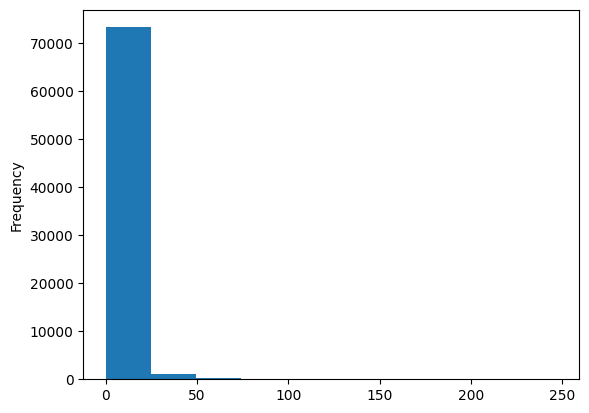

In [17]:
#histogram to show frequency of aqi values
global326['Value_PM2.5'].plot.hist(by=None, bins=10)

In [37]:
global326.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'UTC', 'Unit_PM10', 'Value_PM10',
       'AQI_PM10', 'Category_PM10', 'Unit_PM2.5', 'Value_PM2.5', 'AQI_PM2.5',
       'Category_PM2.5', 'Unit_CO', 'Value_CO', 'AQI_CO', 'Category_CO',
       'Unit_NO2', 'Value_NO2', 'AQI_NO2', 'Category_NO2', 'Unit_SO2',
       'Value_SO2', 'AQI_SO2', 'Category_SO2', 'Unit_OZONE', 'Value_OZONE',
       'AQI_OZONE', 'Category_OZONE', 'State', 'PST', 'coordinates',
       'mercator', 'mercator_x', 'mercator_y'],
      dtype='object')

In [63]:
# generate a tuple of Latitude and Longitude to represent unique location
global_max = global326.groupby(by='mercator')[['Value_PM2.5','AQI_PM2.5','Value_OZONE','AQI_OZONE']].max().reset_index().dropna()
global_max[['mercator_x', 'mercator_y']] = global_max['mercator'].apply(pd.Series)

In [64]:
global_max

,mercator,Value_PM2.5,AQI_PM2.5,Value_OZONE,AQI_OZONE,mercator_x,mercator_y
1,"(-17574130.462973975, 2428152.5260896995)",11.7,49.0,41.0,38.0,-1.757413e+07,2.428153e+06
26,"(-16444924.47268044, 9567871.271114912)",14.7,56.0,34.0,31.0,-1.644492e+07,9.567871e+06
29,"(-15988139.413744044, 11111782.378081301)",7.8,33.0,25.0,23.0,-1.598814e+07,1.111178e+07
30,"(-15034671.277176037, 8561748.809614765)",11.9,50.0,47.0,44.0,-1.503467e+07,8.561749e+06
35,"(-14320042.559009211, 7182838.255242531)",4.8,20.0,35.0,32.0,-1.432004e+07,7.182838e+06
...,...,...,...,...,...,...,...
2148,"(11190886.51581091, 1557331.5427104798)",20.5,69.0,41.0,38.0,1.119089e+07,1.557332e+06
2160,"(11199321.416267298, 1578509.9967667612)",36.0,102.0,43.0,40.0,1.119932e+07,1.578510e+06
2174,"(11892732.639488926, -689576.2549273274)",53.7,146.0,47.0,44.0,1.189273e+07,-6.895763e+05
2176,"(12614511.853827365, 2646147.9308025865)",40.0,112.0,88.0,156.0,1.261451e+07,2.646148e+06


In [65]:
# Select tile set to use
chosentile = get_provider(Vendors.CARTODBPOSITRON)

palette = Inferno[11]

source = ColumnDataSource(data=global_max)

In [66]:
# Define color mapper - which column will define the colour of the data points
color_mapper = linear_cmap(field_name = 'Value_PM2.5', palette = palette, 
                           low = 0, high = 50)

In [67]:
tooltips = [("Value_PM2.5","@{Value_PM2.5}"), ("AQI Ozone","@{AQI_OZONE}")]

In [68]:
# Create figure
p = figure(title = 'AQI PM2.5 Values on 3-26-2024',
           x_axis_type="mercator", y_axis_type="mercator", 
           x_axis_label = 'Longitude', y_axis_label = 'Latitude', tooltips = tooltips)

# Add map tile
p.add_tile(chosentile)

# Add points using mercator coordinates
p.circle(x = 'mercator_x', y = 'mercator_y', color = color_mapper, source=source, size=2, fill_alpha = 0.7)

GlyphRenderer(id='p1396', ...)

In [69]:
#Defines color bar
color_bar = ColorBar(color_mapper=color_mapper['transform'], 
                     formatter = NumeralTickFormatter(format='0.0[0000]'), 
                     label_standoff = 13, width=8, location=(0,0))
# Set color_bar location
p.add_layout(color_bar, 'right')

In [70]:
# Display in notebook
output_notebook()

# Save as HTML
output_file('aqu25.html', title='AQI PM2.5 Values on 3-25-2024')

Loading BokehJS ...

In [71]:
show(p)